In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

## Марафон

Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать `n` часов. Побеждает тот, кто пробегает за эти `n` часов больше всего километров. Каждый участник бежит по-разному -- то сколько он пробежит за лдин час поддается одному из законов распределений. Например, если распределение равномерно $U[1,3]$, то участник может пробежать за первый час 1,3 км, за второй 2,4 км и т.д.

- Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается отведать мёда и пробегает мало. Его закон распределения — это показательное распределение с $\lambda = 1$.
- Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения — это нормальное распределение $N(1,1)$.
- Кролик — перфекционист. Он бежит целое количество километров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он станавливается и ждет следующий час. Его закон распределения — это распределение Пуассона с $\lambda = 1$.
- Иа-Иа в течение часа может грустить с вероятностью $p = 0.5$ и пробежать 0 километров или быть очень веселым (с вероятностью $1 - p$) и пробежать сразу 2 километра. Его закон распределения — это распределение Бернулли.


### Задание №1

- Создать трехмерную матрицу $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось — за каждого участинка, а третья — за каждый час марафона. Вторую и третью ось можно поменять местами.
- Выявить победителя в каждом из $10^4$ марафонов.
- Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
- Использовать возможности библиотеки Numpy.

### Задание №2

Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

- Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
- Выявить победителя в каждом из $10^4$ марафонов.
- Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

In [22]:
n = 6 # количество часов в марафоне
m = int(10e4) # количество марафонов 10^4

In [23]:
A = sts.expon.rvs(scale=1, size=(m, n)) # Винни-Пух c экспоненциональным распределением с 𝜆=1

In [24]:
B = sts.norm.rvs(loc=1, scale=1, size=(m, n)) # Пятачок с нормальным распределением N(1,1)

In [25]:
C = sts.poisson.rvs(mu=1, loc=1, size=(m, n)) # Кролик с пуассоновским распределением с 𝜆=1

In [26]:
D = sts.bernoulli.rvs(p=0.5, loc=0, size=(m, n)) # Иа-Иа с распределением Бернулли c p=0.5 (либо 0, либо 2)
D[D == 1] = D[D == 1] + 1

In [27]:
maraphon = np.dstack([A, B, C, D]) # объединяем распределения в общую матрицу 10^4×4×𝑛

In [28]:
maraphon.shape

(100000, 6, 4)

#### Столбчатая диаграмма победителей

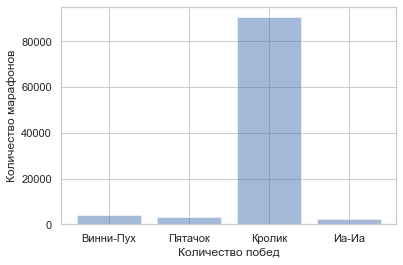

In [64]:
plt.bar(np.arange(maraphon.shape[2]), 
                    pd.Series(maraphon.sum(axis=1).argmax(axis=1)). \
                    value_counts(sort=False), 
                    align='center', 
                    alpha=0.5
);
plt.xticks(np.arange(maraphon.shape[2]), ['Винни-Пух', 
                                          'Пятачок', 
                                          'Кролик', 
                                          'Иа-Иа'
                                         ]
);
plt.xlabel('Количество побед')
plt.ylabel('Количество марафонов');

In [47]:
#pd.Series(maraphon.sum(axis=1).argmax(axis=1)).value_counts().plot(kind='bar');

#### Объединение в команды

In [33]:
C1 = maraphon[:,:,:2].sum(axis=1) # команда №1
C2 = maraphon[:,:,2:].sum(axis=1) # команда №2

In [34]:
maraphon_c = np.dstack([C1, C2])

In [35]:
maraphon_c.shape

(100000, 2, 2)

#### Столбчатая диаграмма команд победителей

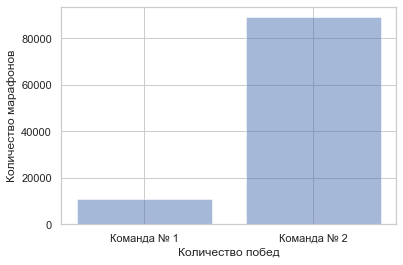

In [66]:
plt.bar(np.arange(maraphon_c.shape[2]), pd.Series(maraphon_c.sum(axis=1).argmax(axis=1)).value_counts(sort=False), 
                                   align='center', alpha=0.5)
plt.xticks(np.arange(maraphon_c.shape[2]), ['Команда № 1', 'Команда № 2'])
plt.xlabel('Количество побед')
plt.ylabel('Количество марафонов');

In [17]:
#pd.Series(np.dstack([C1, C2]).sum(axis=1).argmax(axis=1)).value_counts().plot(kind='bar');

## Парадокс дней рождения

Прочитайте про <a href="https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81_%D0%B4%D0%BD%D0%B5%D0%B9_%D1%80%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F">парадокс дней рождения</a>. В этой задаче предстоит его проверить.
В произвольной группе из 50 человек вероятность того, что хотя бы у двоих людей  дни рождения совпадут, равно 0,97. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так и реальная вероятность будет отличаться от теоретической.

В этой задаче предстоит проверить парадокс дней рождения на эмпирических данных.

 1. Выбрать сообщество в ВКонтакте. С помошью vkAPI выбрать информацию по ее подписчикам (id и дату рождения).
 2. Удалите из данных всех, кто не указал дату рождения. Приведите колонку с датами к одному виду.
 3. Постройте гистограмму, на которой было бы понятно в какой месяц родилось какое количество людей. Равномерно ли распрелилась рождаемость в течение года?
 4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днем рождения.

### Извлечение данных

In [67]:
import requests
import json

In [68]:
token = "50d2e9bc50d2e9bc50d2e9bc1850a3e2da550d250d2e9bc0e4675f2927730572196c1af"
v = 5.103

In [69]:
params = dict(group_id = "welovedmitrov", offset = 2000, count = 1000)

In [70]:
pub_id = "welovedmitrov"

In [71]:
def vk(method, params=""):
    if params:
        params = "?%s" % '&'.join([f"{key}={value}" for key, value in params.items()])
    url = "https://api.vk.com/method/%s%s&access_token=%s&v=%s" % (method, params, token, v)
    data = requests.get(url).json()
    return data

In [72]:
count = vk("groups.getById", dict(group_id=pub_id, 
                                  fields="members_count"))['response'][0].get('members_count')

In [74]:
offset = 1000
params = dict(group_id=pub_id, offset=0, count=offset, fields="bdate")
res = []

for i in range(count // offset):
    params["offset"] += offset
    response = vk(method="groups.getMembers", params=params)['response']
    res += [(x['id'], x.get('bdate')) for x in response['items']]

In [75]:
bd = pd.DataFrame(res, columns=['id', 'birth date'])

In [76]:
bd = bd.dropna()

In [77]:
bd['birth date'] = bd['birth date'].apply(lambda x: pd.to_datetime(x) if len(x) > 5 
                                          else pd.to_datetime('%s.2020' %x))

### Гистограмма распределения рождаемости

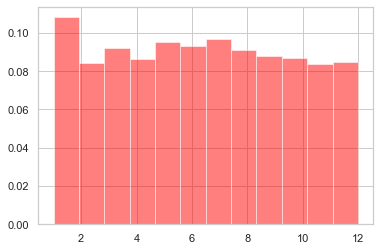

In [99]:
plt.hist(bd['birth date'].dt.month, bins=12, density=True, 
                                    histtype='bar', color='red', alpha=0.5);

In [88]:
#plt.bar(np.arange(1, 13), bd['birth date'].dt.month.value_counts(sort=False), 
#                          align='center', alpha=0.5);

In [30]:
#bd['birth date'].dt.month.value_counts(sort=False).plot(kind='bar')

In [94]:
bd.index = pd.RangeIndex(0, len(bd.index)) # перестройка индекса после удаления пустых строк

In [95]:
from datetime import datetime

In [96]:
bd['day'] = bd['birth date'].apply(lambda x: x.strftime('%m-%d')) # извлечение дня и месяца из даты

In [97]:
group_by_50 = bd.index // 50 # разбивка индекса по 50 строк

###  Получение вероятности

In [98]:
bd.groupby(group_by_50).agg({'day': lambda x: 
                             (x.size - x.nunique()) != 0})['day'].sum() / len(group_by_50.unique())

0.9757127771911299